In [2]:
import numpy as np
import matplotlib.pyplot as plt
try:
    import faiss
except ImportError:
    # esnure you are using this version due to a object depreciation that means \
    # the clustering does not run on the newer version
    !pip3 install faiss-gpu==1.6.1
    import faiss

In [ ]:
#may have to compile pytorch with cuda in terminal with:
# conda install -c pytorch torchvision cudatoolkit=10.1 pytorch

In [15]:
DIR="/home/jovyan/gtc-exposure/data/"
ARCH="vgg16"
#LR=0.05
LR=0.025
K=10
EPOCHS = 20
EXP='/home/jovyan/gtc-exposure/deepcluster/output/'

#make output directory:
#!mkdir -p ${EXP}

In [16]:
!python3 main.py {DIR} --exp {EXP} --arch {ARCH} --lr {LR} --wd {WD}\
  --k {K} --sobel --verbose --workers {WORKERS} --epochs {EPOCHS}

Architecture: vgg16
Load dataset: 0.01 s
Compute features
0 / 952	Time: 1.457 (1.457)
200 / 952	Time: 0.018 (0.025)
400 / 952	Time: 0.018 (0.022)
600 / 952	Time: 0.019 (0.021)
800 / 952	Time: 0.019 (0.020)
Cluster the features
k-means loss evolution: [2993.4365 1781.9724 1763.5085 1743.1678 1722.1056 1715.7262 1712.5488
 1710.1202 1708.4413 1707.2054 1706.0559 1705.0758 1704.4441 1703.9779
 1703.5096 1703.1079 1702.6427 1702.2413 1701.72   1701.3242]
k-means time: 14 s
Assign pseudo labels
Save checkpoint at: /home/jovyan/gtc-exposure/deepcluster/output/checkpoints/checkpoint_0.0.pth.tar
Epoch: [0][0/952]	Time: 6.921 (6.921)	Data: 0.478 (0.478)	Loss: 2.4112 (2.4112)
Epoch: [0][200/952]	Time: 0.080 (0.113)	Data: 0.000 (0.002)	Loss: 2.2969 (5.1165)
Epoch: [0][400/952]	Time: 0.078 (0.097)	Data: 0.000 (0.001)	Loss: 2.1377 (3.6946)
Epoch: [0][600/952]	Time: 0.080 (0.091)	Data: 0.000 (0.001)	Loss: 2.2750 (3.2258)
Epoch: [0][800/952]	Time: 0.079 (0.088)	Data: 0.000 (0.001)	Loss: 1.9867 (2.984

In [19]:
Clustering_Losses =  [1701.3242, 411.22485, 189.89258, 124.46693, 362.2454, 135.13354, 121.703476, 98.946655, 103.450836, 333.14832, 134.04051, 76.007126, 93.729454, 82.882576, 64.21318, 1.7320182, 61.993702, 64.226524, 60.922623, 130.84863]
Losses = [2.8690630283926715, 1.7854889563652647, 1.0542925425938197, 1.1187248009593547, 1.1845567190096158, 1.104070780219651, 0.7988833480146753, 0.7197229013222606, 0.9556968420618722, 1.2162190074054133, 0.8645064965391359, 0.49366465542747195, 0.6555514621133564, 0.6185101265666866, 0.409366842703659, 0.25146030578292716, 0.4811964559079218, 0.503528305024159, 0.35073718253303976, 1.0713273907283776]

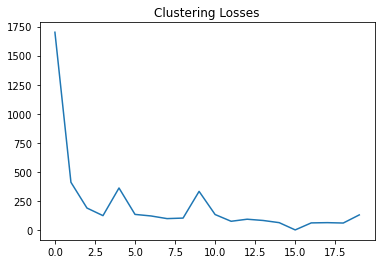

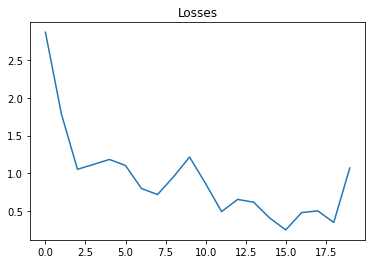

In [21]:
plt.plot(range(EPOCHS), Clustering_Losses)
plt.title('Clustering Losses')
plt.show()

plt.plot(range(EPOCHS), Losses)
plt.title('Losses')
plt.show()

# Log

### 15/02/21 -Ira - Following Error:
Esnure you are using this version due to a object depreciation that means the clustering does not run on the newer version

Fix: ```pip3 unintall faiss-gpu```
```pip3 install faiss-gpu==1.6.1```

### 16/02/21 -Ira - Following Error:
Reduce PCA to 10 as a trial due to following error:
```failed: PCA matrix cannot output 256 dimensions from 4096```

Reduce number of clusters to 6:
```Error: 'nx >= k' failed: need at least as many training points as clusters```

Also reduce final sequential layer in the model from ```4096``` to ```2048``` to help with the dimentionailty reduction due to the low resoltuion of the input images from sentinel to overcome: 

### 19/02/21 -Ira - Following Error:
```
RuntimeError: Error in virtual void faiss::Clustering::train(faiss::Clustering::idx_t, const float*, faiss::Index&) at Clustering.cpp:90: Error: 'finite (x_in[i])' failed: input contains NaN's or Inf's
```

Niave solution: reduce the learning rate from ```0.05``` to ```0.005```. This 100% gets stuck in a local minima, however at least it works!


It also takes forever and as the performance doesn't get better over time, due to being in this minima- reduce epochs from ```200``` to ```20```. 

Action points, change this learning rate- improve PCA and K-means.

### 22/02/21 -Ira:

Generated more data points restrictions on dimentionailty: Increase PCA to ```64``` as a trial due to following error. Model runs somewhat better now. Next step: be more selective on training images to esnure model is given a balanced dataset.

Generated smaller dataset tiles as to include less different types in each image.

### 23/02/21 -Ira:

Increased the learning rate and this seesm to improve model- based on losses anyway.


